# Scenario

You are a junior data analyst in Cyclistic’s marketing analytics team, a bike-share company in Chicago. The marketing director believes boosting annual memberships is key to the company’s success. To achieve this, your team aims to analyze how casual riders and annual members use Cyclistic bikes differently. These insights will guide a marketing strategy to convert casual riders into members. However, before implementation, Cyclistic executives must approve your recommendations, which should be supported by strong data insights and professional visualizations.

#  Background & Business Question

Founded in 2016, Cyclistic is a thriving bike-share program in Chicago, featuring 5,824 GPS-enabled bicycles and 692 docking stations.

The company’s marketing strategy has traditionally focused on broad public awareness and accessibility. A key aspect of this strategy is its flexible pricing structure, which includes three options: (1) single-ride, (2) full-day, and (3) annual memberships.

Financial analysts at Cyclistic have identified annual members as the most profitable customer segment. To drive revenue growth, the company aims to increase the number of annual memberships by converting single-ride and full-day users into long-term members.

**This study seeks to answer the question — how does Cyclistic bicycle use differ between annual members and casual riders?**

 # Data Preparation

Cyclistic ride data is available at the following [link!]: https://divvy-tripdata.s3.amazonaws.com/index.html.

This study utilizes data collected between Jan 2024 and Dec 2024 (‘202401-divvy-tripdata.csv’ → ‘202412-divvy-tripdata.csv’). Files were loaded into R-Studio Desktop for analysis and renamed to improve readability.

In [ ]:
data_2024_01 <- read.csv("202401-divvy-tripdata.csv")
data_2024_02 <- read.csv("202402-divvy-tripdata.csv")
data_2024_03 <- read.csv("202403-divvy-tripdata.csv")
data_2024_04 <- read.csv("202404-divvy-tripdata.csv")
data_2024_05 <- read.csv("202405-divvy-tripdata.csv")
data_2024_06 <- read.csv("202406-divvy-tripdata.csv")
data_2024_07 <- read.csv("202407-divvy-tripdata.csv")
data_2024_08 <- read.csv("202408-divvy-tripdata.csv")
data_2024_09 <- read.csv("202409-divvy-tripdata.csv")
data_2024_10 <- read.csv("202410-divvy-tripdata.csv")
data_2024_11 <- read.csv("202411-divvy-tripdata.csv")
data_2024_12 <- read.csv("202412-divvy-tripdata.csv")

The data was processed using the following libraries: tidyverse for data cleaning, lubridate for date handling, hms for time manipulation, and data.table for exporting.

In [ ]:
library(tidyverse) #data cleaning
library(lubridate) #date manipulation
library(hms) #time manipulation
library(data.table) #exporting data

# Data Processing

All monthly data files were merged into one data frame containing 12 months of data. After that, the individual files were removed to keep the environment tidy. A copy of the data frame was made to ensure data integrity.

In [ ]:
#merge files into a single df 
data_12_months <- rbind(data_2024_01, data_2024_02, data_2024_03, data_2024_04, data_2024_05, data_2024_06, data_2024_07, data_2024_08, data_2024_09, data_2024_10, data_2024_11, data_2024_12) 
#drop monthly files from the environment
remove(data_2024_01, data_2024_02, data_2024_03, data_2024_04, data_2024_05, data_2024_06, data_2024_07, data_2024_08, data_2024_09, data_2024_10, data_2024_11, data_2024_12)
#copy df
data_12_months_2 <- data_12_months

 ride length = (ride_length) and day of the week = (day_of_week) columns were created.

In [ ]:
#create column ride_length in minutes
data_12_months_2$ride_length <- difftime(data_12_months_2$ended_at, data_12_months_2$started_at, units = "mins")
#create column day_of_week in text
data_12_months_2$day_of_week <- wday(data_12_months_2$started_at)

 added numeric columns for date, month, day, year, and season.

In [ ]:
#create numeric columns for the day of week, date, month, day, year
data_12_months_2$date <- as.Date(data_12_months_2$started_at)
data_12_months_2$day_of_week <- format(as.Date(data_12_months_2$date), "%A")
data_12_months_2$month <- format(as.Date(data_12_months_2$date), "%m") 
data_12_months_2$day <- format(as.Date(data_12_months_2$date), "%d")
data_12_months_2$year <- format(as.Date(data_12_months_2$date), "%Y")
#create a column for ride season classification
data_12_months_2 <- data_12_months_2 %>% mutate(season = 
  case_when(month == "03" ~ "Spring",
            month == "04" ~ "Spring",
            month == "05" ~ "Spring",
            month == "06" ~ "Summer",
            month == "07" ~ "Summer",
            month == "08" ~ "Summer",
            month == "09" ~ "Fall",
            month == "10" ~ "Fall",
            month == "11" ~ "Fall",
            month == "12" ~ "Winter",
            month == "01" ~ "Winter",
            month == "02" ~ "Winter")
)

The raw data had duplicates, missing values, and invalid entries, which were cleaned. It also included unnecessary columns like ride IDs, station IDs, and location coordinates. While the coordinates could be an interesting analysis for a future project, they were not needed for this one.

I'm currently learning and using this project as a reference to create my own version with a personal approach.

In [ ]:
#remove duplicate rows
data_12_months_2 <- distinct(data_12_months_2)
#remove rows with null values
data_12_months_2 <- na.omit(data_12_months_2)
#remove rows where ride_length is <= to zero
data_12_months_2 <- data_12_months_2[!(data_12_months_2$ride_length <=0),]
#remove unneeded columns
data_12_months_2 <- data_12_months_2 %>%  
  select(-c(ride_id, start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng))

Changed a confusing column name member_casual to member_type.

In [ ]:
#rename member_casual to member_type
data_12_months_2 <- data_12_months_2 %>% 
  rename(member_type = member_casual)

Converting ride_length from a character to a numeric value.

In [ ]:
#convert ride_length to numeric
data_12_months_2$ride_length <- as.numeric(as.character(data_12_months_2$ride_length))
is.numeric(data_12_months_2$ride_length)
#view final df
View(data_12_months_2)

# Analysis & Visualization

Visualizations were created in RStudio using the ggplot2 package. Given the large size of the dataset (n = 5,855,094), ggplot2 automatically used scientific notation for axis labels. The following code was used to adjust this default behavior.

In [ ]:
#converts values from scientific notation 
options(scipen = 999)

**The total number of rides taken during the period of study was approximately 5.8 million.**

In [ ]:
#total number of rides
nrow(data_12_months_2)
#total number of rides rounded
round(nrow(data_12_months_2), digits = -5)

Counting casual rides and membership rides. **2,145,516** of these rides were casual rides (single ride or full day) and **3,707,097** rides were taken by members.

In [ ]:
#count member types
data_12_months_2 %>% count(member_type)

In [ ]:
Counting the number of rides taken on classic style bikes, docked bikes and electric bikes.
2,728,326 rides were taken on classic style bicycles, 2,979,950 riders utilized docked bicycles, and 144337 riders utilized electric scooter.

In [ ]:
#total rides by bike type
data_12_months_2 %>%
  group_by(rideable_type) %>% 
  count(rideable_type)

## Visualization using plot

In [ ]:
data_12_months_2 %>%
  group_by(rideable_type, member_type) %>%
  dplyr::summarize(count_trips = n()) %>%  
  ggplot(aes(x = rideable_type, y = count_trips, fill = member_type, color = member_type)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  scale_fill_manual(values = c("skyblue", "orange")) +  # Custom colors
  scale_color_manual(values = c("skyblue", "orange")) +  # Custom colors
  theme_bw() +
  labs(title = "Trips by Bicycle Type and Membership", 
       x = "Bicycle Type", 
       y = "Trip Count",
       fill = "Membership Type", 
       color = "Membership Type")


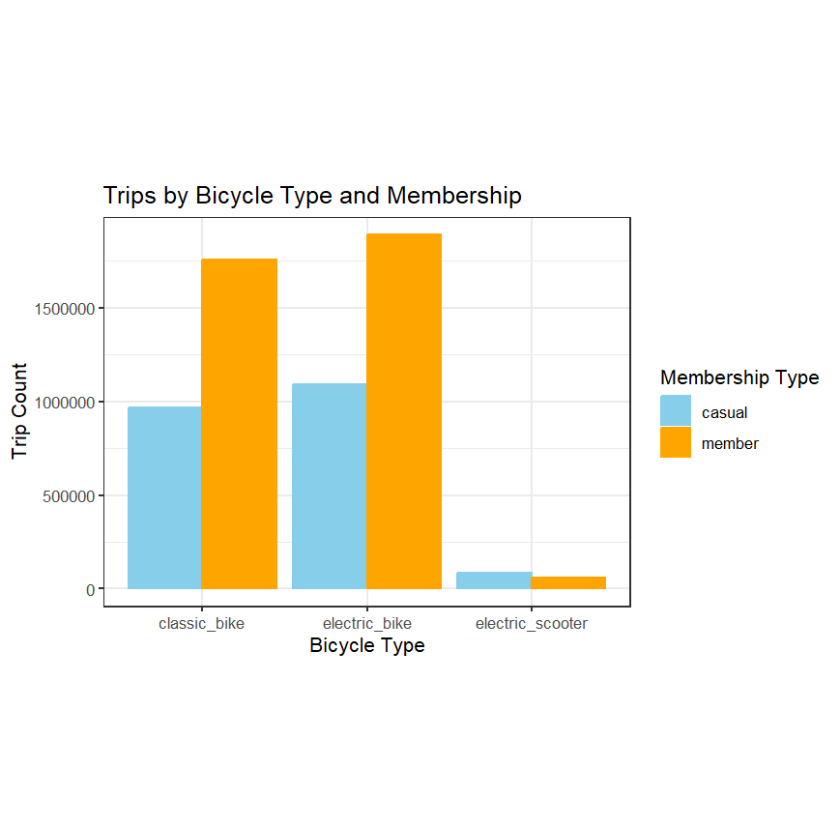

In [3]:
# Reading and displaying the PNG image of the plot in this notebook
library(png)
library(grid)

img_path <- "/kaggle/input/plot-image/Rplot.png"
img <- readPNG(img_path)
grid.raster(img)


Casual riders used all three bike styles — **9,609,050** casual rides were taken on classic bike, **1,091,251** on electric bike, and **85,215** on electric scooter.

Members used classic bikes in **1,759,276** cases, electric bike in **1,091,251** cases and electric scooter in **59,122** cases

The average ride was 15.48 mins. and the median ride was 9.70 mins. The shortest ride taken was 0.0006 mins — an erroneous data point. The longest ride taken was 1509.36 mins.

In [ ]:
#min, max, median, mean length of ride
summary(data_12_months_2$ride_length)

In this report, a week is defined as Monday through Sunday. The chart below illustrates the number of rides per day by member type. Members had higher activity levels than casual riders on weekdays, whereas casual users were more active on weekends.

Saturday was the busiest day for casual riders, while Wednesday saw the highest activity among members.

In [ ]:
#arrange days of the week in order
data_12_months_2$day_of_week <- ordered(data_12_months_2$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
#plot number of rides by day of week
data_12_months_2 %>% 
  group_by(member_type, day_of_week) %>%
  dplyr::summarize(count_trips = n()) %>%  
  ggplot(aes(x= day_of_week, y=count_trips, fill=member_type, color=member_type)) +
  geom_bar(stat='identity', position = 'dodge') +
  theme_bw()+
  labs(title ="Number of Rides by Day of Week", x = "Day of Week", y = "Number of Rides")

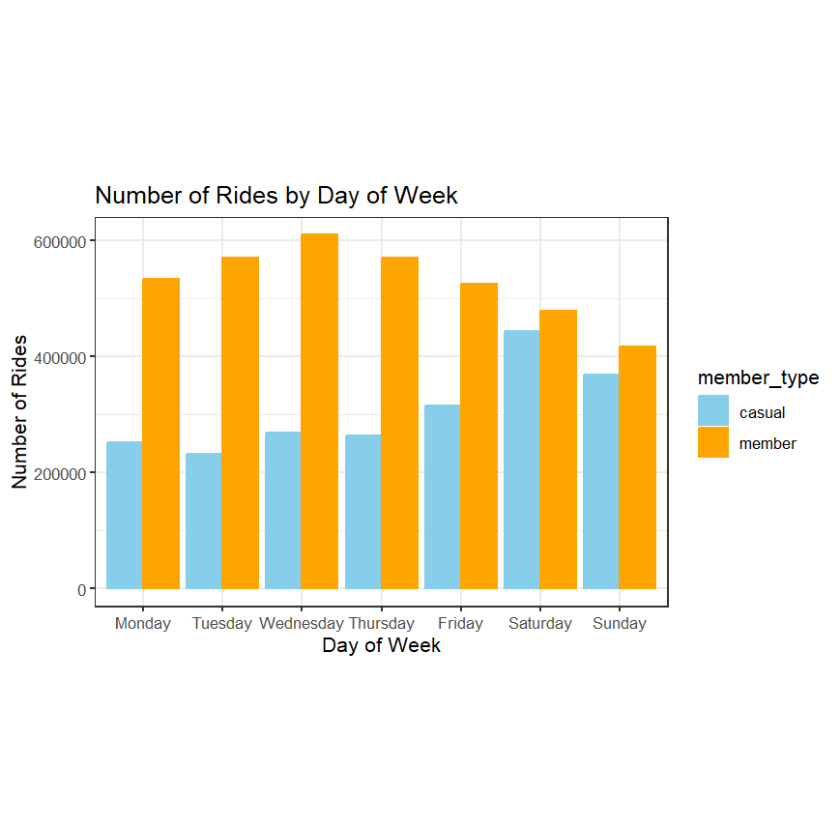

In [5]:
library(png)
library(grid)

# Correct path including filename
img_path <- "/kaggle/input/plot-2/Rplot.png"  

# Read and display the image
img <- readPNG(img_path)
grid.raster(img)


I also plotted the number of rides per month, by member type. The summer months, particularly July and August, were the most popular for casual users. Members used bicycles at a higher rate than casual users from September through May. Member use was more consistent than casual use from May through October.

In [ ]:
library(ggplot2)
library(dplyr)

# Arrange months in order
data_12_months_2$month <- ordered(data_12_months_2$month, 
                                  levels=c("01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"))

# Plot number of rides per month
data_12_months_2 %>%
  group_by(member_type, month) %>%
  dplyr::summarize(count_trips = n()) %>%  
  ggplot(aes(x=month, y=count_trips, fill=member_type, color=member_type)) +
  geom_bar(stat='identity', position='dodge') +
  theme_bw() +
  scale_fill_manual(values=c("casual" = "lightblue", "member" = "orange")) +  # Custom colors
  scale_color_manual(values=c("casual" = "lightblue", "member" = "orange")) +  # Matching outline colors
  labs(title ="Number of Rides per Month", x = "Month", y = "Number of Trips")


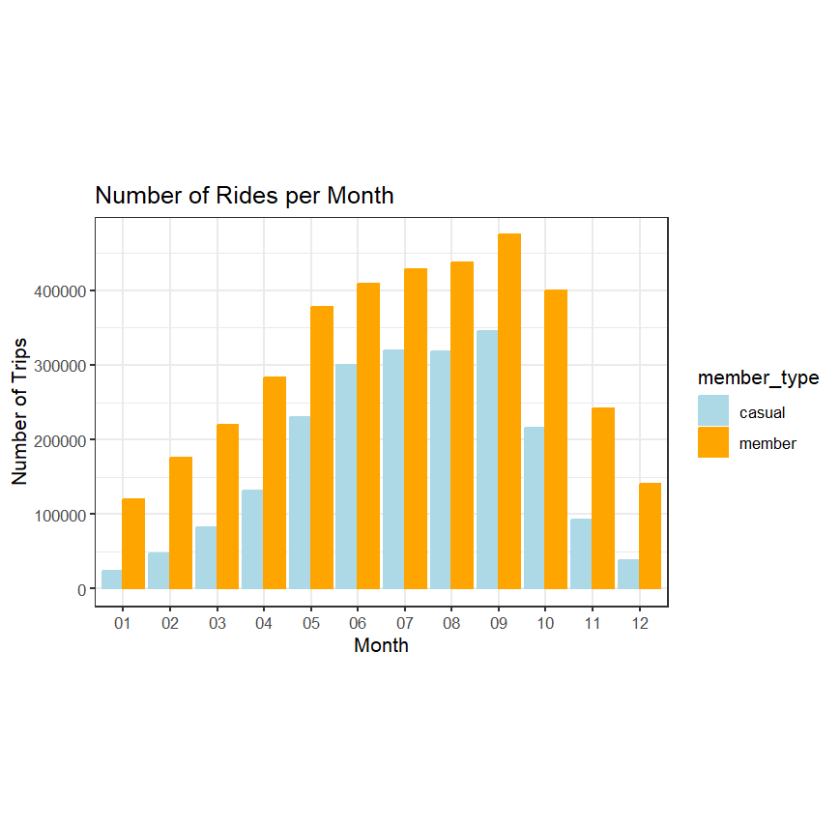

In [4]:
library(png)
library(grid)

# Correct path including filename
img_path <- "/kaggle/input/rplot03/Rplot03.png"  

# Read and display the image
img <- readPNG(img_path)
grid.raster(img)

Filtering the data by season provides a higher-level picture. Summer is the most popular season for all users (2,212,299 rides), followed by fall (1,770,613 rides), spring (2,212,299 rides), and winter (545,539 rides).

Filtering by season and user type provides even greater resolution.

In [ ]:
#total rides by member type
data_12_months_2 %>%
  group_by(season, member_type) %>% 
  count(season)
#total rides
data_12_months_2 %>%
  group_by(season) %>% 
  count(season)

The top 5 start stations for casual users can be viewed below. Casual user start stations seem to predominately be in the vicinity of tourist attractions.

In [ ]:
#Find popular start station for casual riders
data_12_months_2 %>%
  group_by(member_type, start_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(start_station_name != "", "casual"== member_type) %>%
  arrange(-number_of_ride) %>%
  head(n=5) %>%
  select(-member_type)

The top 5 start stations for members can be viewed below.

In [ ]:
#Find popular start station for member riders
data_12_months_2 %>%
  group_by(member_type,start_station_name) %>%
  dplyr::summarise(number_of_ride = n()) %>%
  filter(start_station_name != "", "member" == member_type) %>%
  arrange(-number_of_ride) %>%
  head(n=5) %>%
  select(-member_type)

# Recommendations

To boost member engagement, I suggest the following strategies:

* Replace electric bikes with a fleet consisting of classic bikes and electric scooters only.

* Expand the network by adding start and end stations beyond tourist-heavy areas, focusing on the top 5 locations listed above.

* Reach out to local businesses and encourage their employees to use bicycles for commuting.

* Ramp up marketing efforts in late Spring and early Summer to optimize usage during the summer months.

* Provide casual users with a promotional opportunity to upgrade to full membership, targeting the most popular start and end stations for casual riders.